In [1]:
import pandas as pd

df_age = pd.read_csv("train.csv")
df_age.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df_age["Sex"] = labelEncoder.fit_transform(df_age["Sex"])

In [8]:
df_age.set_index("id", inplace=True)
df_age.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


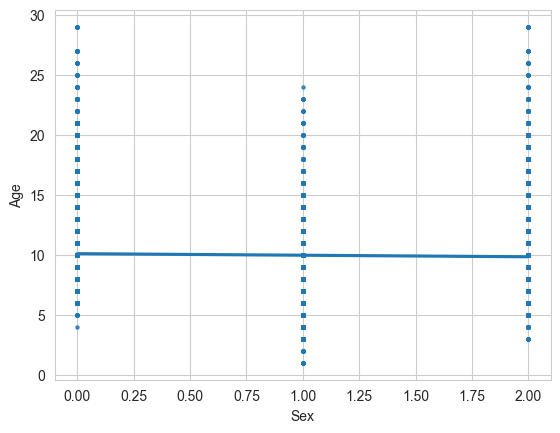

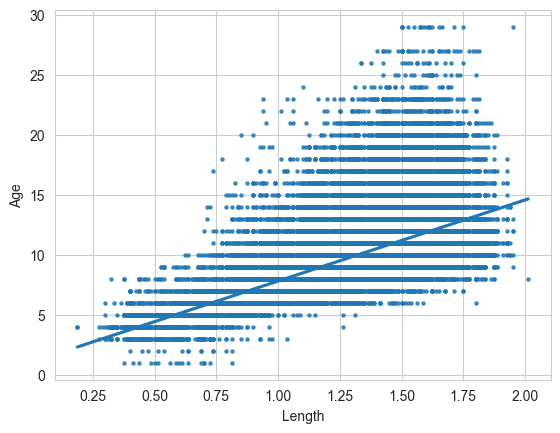

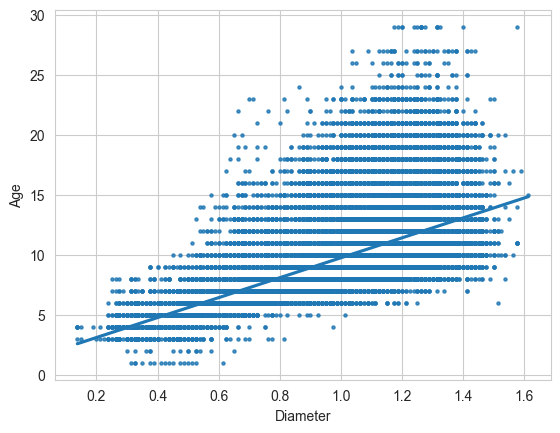

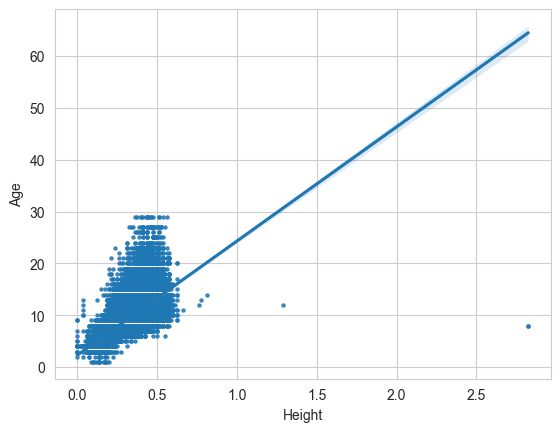

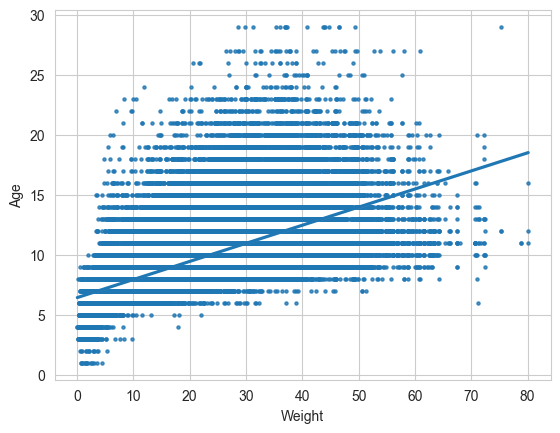

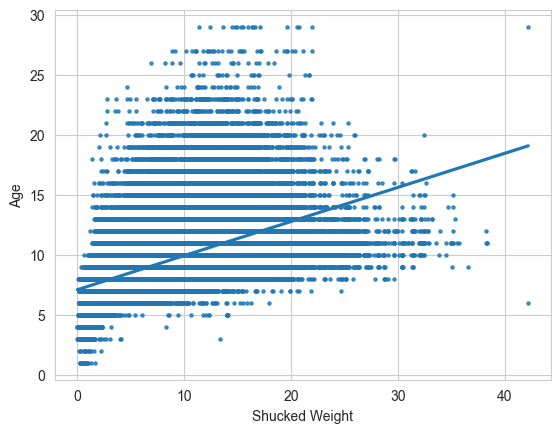

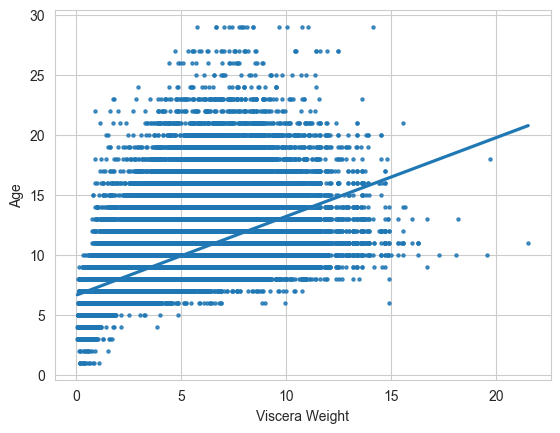

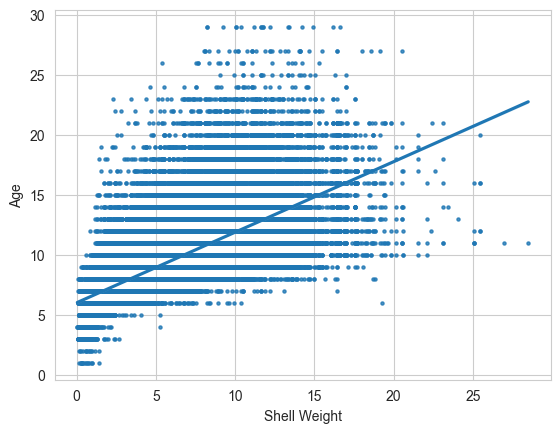

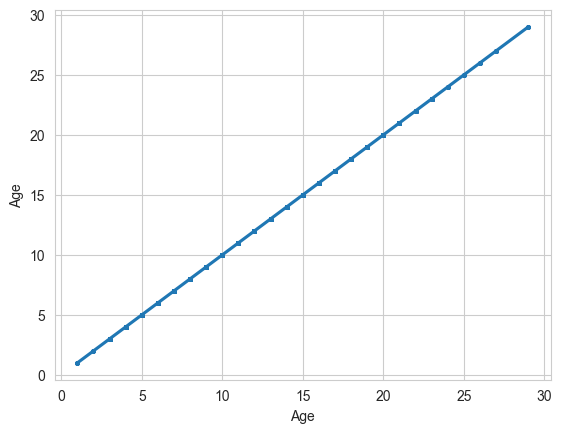

In [12]:
sns.set_style("whitegrid")
for label in df_age.columns.to_list():
    sns.regplot(x=label, y="Age", data=df_age, scatter_kws={"s": 5})
    plt.show()

C:\Users\Aman's Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


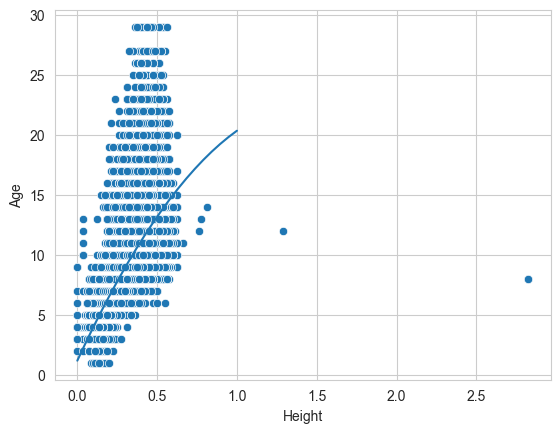

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)
lre = LinearRegression()
weightPoly  = poly_features.fit_transform(df_age[["Height"]])
lre.fit(weightPoly, df_age["Age"])

testData = poly_features.transform(np.linspace(0, 1, num=20).reshape(-1, 1))
weightGraph = lre.predict(testData)
sns.scatterplot(x="Height", y="Age", data=df_age)
plt.plot(np.linspace(0, 1, num=20), weightGraph)

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df_age.iloc[:, 1:-1])
X_normalized_df = pd.DataFrame(X_normalized, columns=df_age.columns.to_list()[1:-1])
linear = []
polynomial = []
for label in X_normalized_df.columns.to_list():
    x_train, x_test, y_train, y_test = train_test_split(X_normalized_df[[label]], df_age["Age"], test_size=0.2, random_state=10)
    lre1 = LinearRegression().fit(x_train, y_train)
    lreScore = mean_absolute_error(lre1.predict(x_test), y_test)

    poly_features = PolynomialFeatures(degree=3)
    lre = LinearRegression()
    weightPoly  = poly_features.fit_transform(x_train)
    lre.fit(weightPoly, y_train)
    polyRegScore = mean_absolute_error(lre.predict(poly_features.fit_transform(x_test)), y_test)
    if lreScore < polyRegScore:
        linear.append(label)
    else:
        polynomial.append(label)

print("Linear: ", linear)
print("Polynomial: ", polynomial)

Linear:  ['Height']
Polynomial:  ['Length', 'Diameter', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']


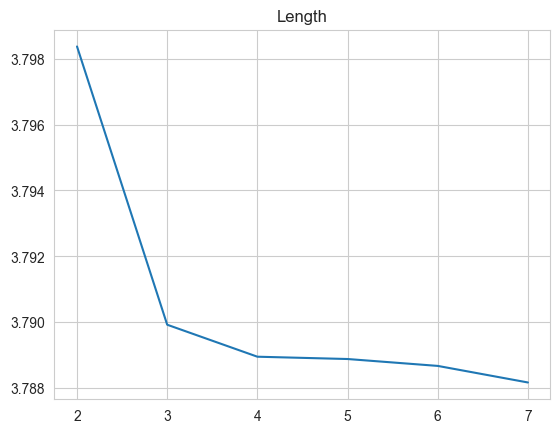

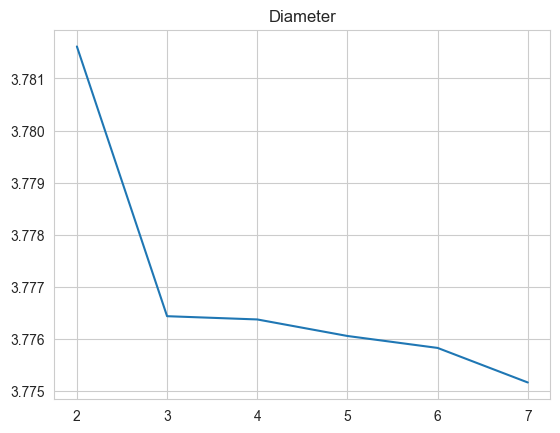

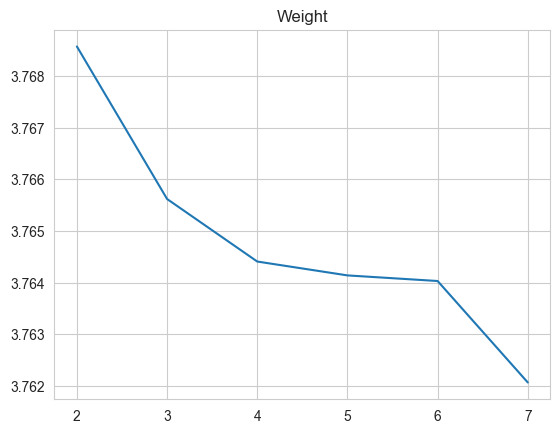

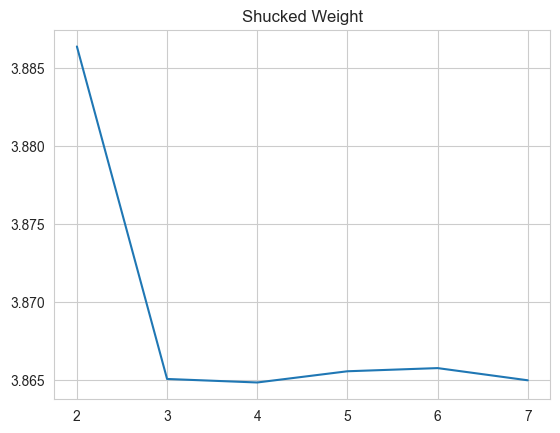

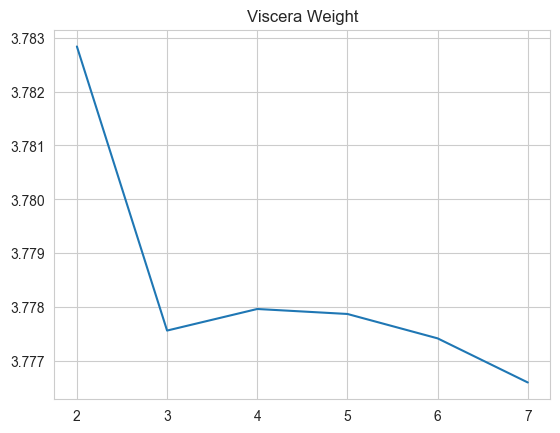

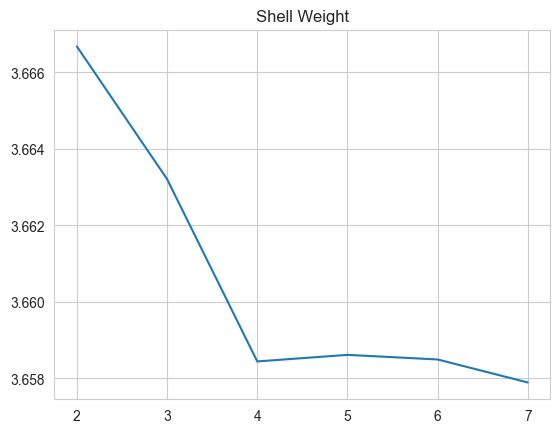

[{'Length': 7}, {'Diameter': 7}, {'Weight': 7}, {'Shucked Weight': 4}, {'Viscera Weight': 7}, {'Shell Weight': 7}]


In [62]:
bestK = []
for label in polynomial:
    x_train, x_test, y_train, y_test = train_test_split(X_normalized_df[[label]], df_age["Age"], test_size=0.2, random_state=10)
    errors = np.empty(6)
    for k in range(2, 8):
        poly_features = PolynomialFeatures(degree=k)
        lre = LinearRegression()
        weightPoly  = poly_features.fit_transform(x_train)
        lre.fit(weightPoly, y_train)
        polyRegScore = mean_absolute_error(lre.predict(poly_features.fit_transform(x_test)), y_test)
        errors[k-2] = polyRegScore
    plt.plot(range(2, 8), errors+2)
    plt.title(label)
    plt.show()
    bestK.append({label: np.argmin(errors)+2})

print(bestK)

In [68]:

X_normalized_df = pd.DataFrame(X_normalized, columns=df_age.columns.to_list()[1:-1])
x_train, x_test, y_train, y_test = train_test_split(X_normalized_df, df_age["Age"], test_size=0.2, random_state=10)

pre = PolynomialFeatures(degree=3)
polyWeights = pre.fit_transform(x_train[polynomial])
polyTestWeights = pre.fit_transform(x_test[polynomial])
x_combined = np.hstack((x_train[linear], polyWeights))
x_test_combined = np.hstack((x_test[linear], polyTestWeights))

lre = LinearRegression()
lre.fit(x_combined, y_train)
mean_absolute_error(lre.predict(x_test_combined), y_test)



1.4627868937484496

In [76]:
df_actual = pd.read_csv("test.csv")
df_actual.set_index("id", inplace=True)
X_normalized_final = scaler.fit_transform(df_actual.iloc[:, 1::])
X_normalized_final_df = pd.DataFrame(X_normalized_final, columns=df_actual.columns.to_list()[1::])
X_normalized_final_df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.466216,0.420168,0.097345,0.106959,0.086079,0.079658,0.094170
1,0.527027,0.504202,0.097345,0.193023,0.166106,0.150099,0.138017
2,0.594595,0.571429,0.115044,0.181335,0.131137,0.179724,0.167912
3,0.736486,0.571429,0.137168,0.353816,0.316745,0.303489,0.245640
4,0.500000,0.478992,0.092920,0.146272,0.130464,0.113891,0.115595


In [84]:

weights = pre.fit_transform(X_normalized_final_df[polynomial])
x_combined = np.hstack((X_normalized_final_df[linear], weights))
predictions = lre.predict(x_combined)

In [86]:
output = pd.DataFrame({"id": df_actual.index.to_list(), "Age": predictions})
output.to_csv("submissionAge.csv", index=False)

,id,Age
0,74051,7.808375
1,74052,8.310880
2,74053,9.686757
3,74054,9.888672
4,74055,7.774385


In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df_age[["Viscera Weight", "Height", "Shell Weight", "Diameter", "Shucked Weight"]])

x_train, x_test, y_train, y_test = train_test_split(X_normalized, df_age["Age"], test_size=0.2, random_state=10)

lre1 = LinearRegression().fit(x_train, y_train)
print(mean_absolute_error(lre1.predict(x_test), y_test))

poly_features = PolynomialFeatures(degree=3)
lre = LinearRegression()
weightPoly  = poly_features.fit_transform(x_train)
lre.fit(weightPoly, y_train)
print(mean_absolute_error(lre.predict(poly_features.fit_transform(x_test)), y_test))


1.5240401311667189
1.4768672551870252


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [ ]:
features = df_age[["Length", "Shell Weight", "Viscera Weight"]]